# Train Agent

In [1]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="Banana.app")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

print("brain_name: ", brain_name)
print("brain: ", brain)
# For detailes: https://github.com/udacity/deep-reinforcement-learning/blob/master/python/unityagents/brain.py

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


brain_name:  BananaBrain
brain:  Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [2]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

%matplotlib inline

from src.dqn_agent import Agent
agent = Agent(state_size=37, action_size=4, seed=0)

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        #for t in range(max_t):
        while True:
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 10 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
    return scores


Episode 10	Average Score: -0.20
Episode 20	Average Score: 0.208
Episode 30	Average Score: 0.17
Episode 40	Average Score: 0.10
Episode 50	Average Score: 0.12
Episode 60	Average Score: 0.18
Episode 70	Average Score: 0.27
Episode 80	Average Score: 0.36
Episode 90	Average Score: 0.48
Episode 100	Average Score: 0.58
Episode 110	Average Score: 0.78
Episode 120	Average Score: 1.04
Episode 130	Average Score: 1.29
Episode 140	Average Score: 1.53
Episode 150	Average Score: 1.79
Episode 160	Average Score: 2.11
Episode 170	Average Score: 2.50
Episode 180	Average Score: 2.79
Episode 190	Average Score: 3.17
Episode 200	Average Score: 3.42
Episode 210	Average Score: 3.56
Episode 220	Average Score: 3.65
Episode 230	Average Score: 3.84
Episode 240	Average Score: 4.21
Episode 250	Average Score: 4.59
Episode 260	Average Score: 4.87
Episode 270	Average Score: 4.92
Episode 280	Average Score: 5.20
Episode 290	Average Score: 5.26
Episode 300	Average Score: 5.72
Episode 310	Average Score: 6.05
Episode 320	Ave

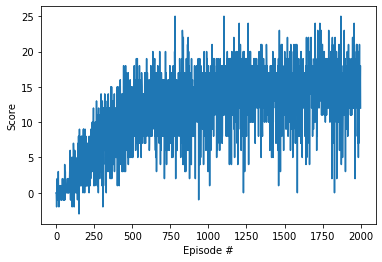

In [5]:
scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [3]:
# Watch trained agent

from PIL import ImageGrab

agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

take_screenshot = False
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
step = 0
while True:
    action = agent.act(state)                      # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if take_screenshot:
        if step % 1  == 0:                         # create screenshot in each step
            filename = "banana_step" + str(step) + ".png" 
            ImageGrab.grab(bbox=(0, 88, 1286, 844)).save(filename) #Screen shot area to be adjusted in your environment
    step += 1
    if done:                                       # exit loop if episode finished
        break

print("Score: {}".format(score))

Score: 13.0


In [5]:
env.close()